In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
%matplotlib inline

Let's load in the indexing log...

In [2]:
data = pd.read_csv('indexing.log', sep=' ', names=['', 'path', 'type', 'start', 'py_time', 'es_time', 'embedded', 'linked'], index_col=None, usecols=[1,2,3,4,5,6,7])
data['start'] -= data['start'][0]
data

,path,type,start,py_time,es_time,embedded,linked
0,/users/09a7c18c-4113-43eb-9f32-c20062fb73de,user,0.000000,0.094622,0.011920,3,3
1,/users/190a7875-9f6a-4f9e-a556-90160acdc0af,user,0.106688,0.029295,0.006201,3,3
2,/users/1f3e20fc-f124-4cb7-b5f9-d7e5e97e90e2,user,0.142318,0.029517,0.003477,3,3
3,/users/27d0edc7-bd06-42c4-9ef2-4ea58bce74bf,user,0.175380,0.022715,0.002808,3,3
4,/users/0b3696b4-e613-45b1-94a2-b4aeb38ef326,user,0.200997,0.036424,0.004457,4,5
5,/users/9a17e42a-7699-4dac-af7d-b16f35f76272,user,0.241982,0.056538,0.005716,3,10
6,/users/0b66f12c-b504-4baa-a694-ce41cad638a0,user,0.304336,0.043337,0.004595,4,7
7,/users/853dbdde-d613-45c9-8fd4-5011f09328d5,user,0.352369,0.025441,0.003008,3,3
8,/users/cliff.meyer%40hotmail.com,user,0.380939,0.022854,0.003441,3,3
9,/users/bc6df64b-2fed-4a0a-9da1-9a4719232511,user,0.407327,0.020792,0.004664,4,7


Remove outliers

In [3]:
trimmed_data = data[np.abs(data.py_time-data.py_time.mean())<=(3*data.py_time.std())]

And visualize the speed of embedding objects in Python, over time:

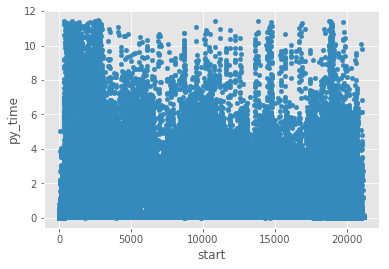

In [4]:
trimmed_data.plot(x='start', y='py_time', kind='scatter')

And also the speed of indexing in elasticsearch, over time:

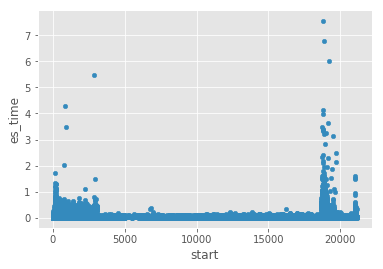

In [5]:
data.plot(x='start', y='es_time', kind='scatter')

What was the slowest single object?

In [6]:
data.ix[data['py_time'].idxmax()]

path        /46296175-32e8-413d-a047-f42c291712c5
type                                         file
start                                     16231.9
py_time                                   1426.81
es_time                                  0.320839
embedded                                    57511
linked                                      59074
Name: 469113, dtype: object

What about the average time and count of embedded/linked objects by type?

In [7]:
grouped = data.groupby(['type'])['py_time', 'es_time', 'embedded', 'linked'].median().sort_values('py_time')
grouped['count'] = data.groupby('type').size()
grouped

,py_time,es_time,embedded,linked,count
type,,,,,
analysis_step_run,0.008907,0.002594,11.0,19.0,93612
tale,0.009013,0.001839,5.0,9.0,78
crispr,0.009538,0.001759,5.0,8.0,413
image,0.009764,0.002015,2.0,3.0,93
organism,0.010272,0.001802,1.0,1.0,28
treatment,0.010599,0.001918,3.0,7.0,209
publication,0.010858,0.008347,4.0,6.0,2776
document,0.010894,0.004803,7.0,9.0,9833
source,0.011946,0.001840,1.0,1.0,279


Which types did we spend the most time indexing?

In [8]:
totals = data.groupby('type')['py_time'].sum().sort_values()
totals

type
fastqc_quality_metric                     0.023062
generic_quality_metric                    0.027822
organism                                  0.319581
platform                                  0.390895
cpg_correlation_quality_metric            0.741198
tale                                      0.856012
image                                     0.985618
award                                     1.172356
talen                                     1.285865
mouse_donor                               1.321319
access_key                                2.434524
lab                                       2.915306
page                                      3.109540
source                                    3.427529
donor_characterization                    3.857635
crispr                                    4.307006
treatment                                 4.653970
replication_timing_series                 7.346320
ucsc_browser_composite                    7.364644
genetic_modification      

In [9]:
grouped['total'] = totals
grouped['pct'] = totals / totals.sum() * 100
grouped.sort_values('pct')

,py_time,es_time,embedded,linked,count,total,pct
type,,,,,,,
fastqc_quality_metric,0.023062,0.005340,1.0,6.0,1,0.023062,0.000007
generic_quality_metric,0.027822,0.005040,1.0,6.0,1,0.027822,0.000008
organism,0.010272,0.001802,1.0,1.0,28,0.319581,0.000097
platform,0.013057,0.002074,2.0,3.0,29,0.390895,0.000119
cpg_correlation_quality_metric,0.075900,0.002784,14.0,24.0,9,0.741198,0.000225
tale,0.009013,0.001839,5.0,9.0,78,0.856012,0.000260
image,0.009764,0.002015,2.0,3.0,93,0.985618,0.000299
award,0.019077,0.003153,4.0,5.0,67,1.172356,0.000356
talen,0.015722,0.002577,8.0,9.0,77,1.285865,0.000390


How does the Python indexing time scale with # of embedded objects?

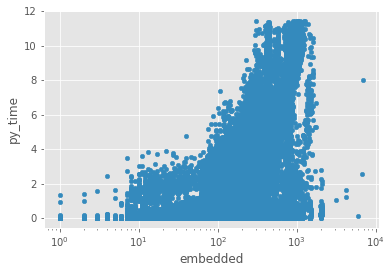

In [10]:
trimmed_data.plot(x='embedded', y='py_time', kind='scatter', logx=True)

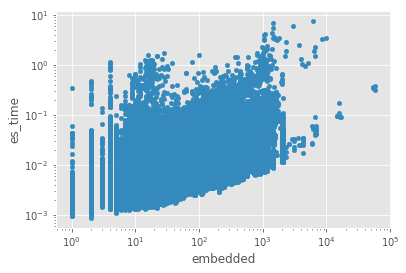

In [11]:
data.plot(x='embedded', y='es_time', kind='scatter', logx=True, logy=True)

In [13]:
grouped.to_excel('indexing_stats_by_type.xls')